In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('breast-cancer-data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.2419
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.1812
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.2069
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2597
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1809
...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.1726
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.1752
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.1590
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.2397


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                569 non-null    int64  
 1   diagnosis         569 non-null    int32  
 2   radius_mean       569 non-null    float64
 3   texture_mean      569 non-null    float64
 4   perimeter_mean    569 non-null    float64
 5   area_mean         569 non-null    float64
 6   smoothness_mean   569 non-null    float64
 7   compactness_mean  569 non-null    float64
 8   symmetry_mean     569 non-null    float64
 9   pred              569 non-null    int32  
dtypes: float64(7), int32(2), int64(1)
memory usage: 40.1 KB


In [4]:
df.isnull().sum()

id                  0
diagnosis           0
radius_mean         0
texture_mean        0
perimeter_mean      0
area_mean           0
smoothness_mean     0
compactness_mean    0
symmetry_mean       0
dtype: int64

In [6]:
df.duplicated().sum()


0

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.00000,869218.00000,906024.00000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.98100,11.70000,13.37000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.71000,16.17000,18.84000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.79000,75.17000,86.24000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.50000,420.30000,551.10000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.05263,0.08637,0.09587,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.01938,0.06492,0.09263,1.304000e-01,3.454000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.10600,0.16190,0.17920,1.957000e-01,3.040000e-01


<Axes: xlabel='radius_mean'>

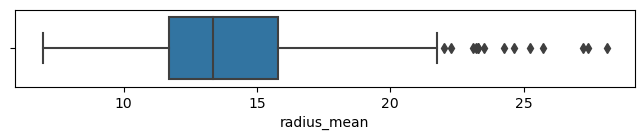

In [6]:
plt.figure(figsize=(8,1))
sns.boxplot(x = 'radius_mean', data = df)

<Axes: xlabel='texture_mean'>

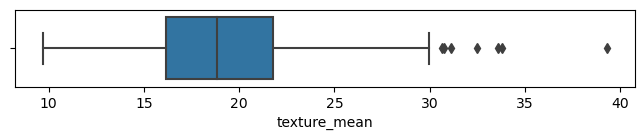

In [7]:
plt.figure(figsize=(8,1))
sns.boxplot(x = 'texture_mean', data = df)

<Axes: xlabel='perimeter_mean'>

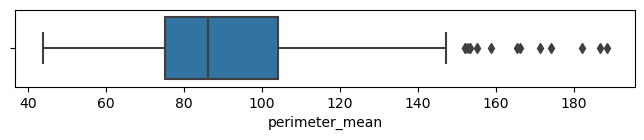

In [8]:
plt.figure(figsize=(8,1))
sns.boxplot(x = 'perimeter_mean', data = df)

<Axes: xlabel='area_mean'>

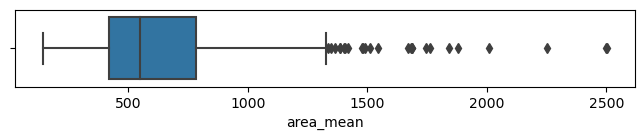

In [9]:
plt.figure(figsize=(8,1))
sns.boxplot(x = 'area_mean', data = df)

<Axes: xlabel='smoothness_mean'>

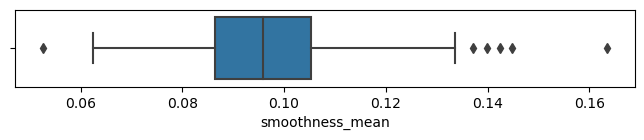

In [13]:
plt.figure(figsize=(8,1))
sns.boxplot(x = 'smoothness_mean', data = df)

<Axes: xlabel='compactness_mean'>

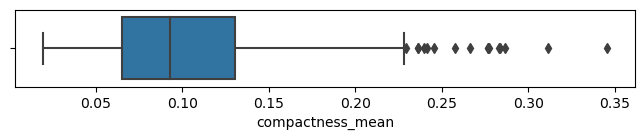

In [14]:
plt.figure(figsize=(8,1))
sns.boxplot(x = 'compactness_mean', data = df)

<Axes: xlabel='symmetry_mean'>

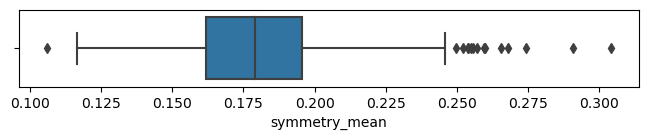

In [10]:
plt.figure(figsize=(8,1))
sns.boxplot(x = 'symmetry_mean', data = df)

In [11]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [19]:
# le = LabelEncoder()
# df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [20]:
# df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.2419
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.1812
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.2069
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2597
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1809
...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.1726
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.1752
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.1590
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.2397


TypeError: can't multiply sequence by non-int of type 'float'

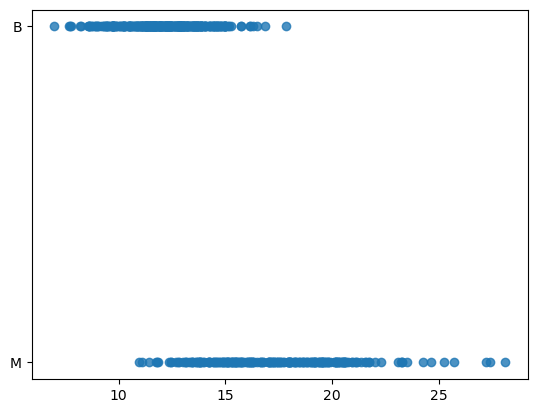

<Axes: xlabel='texture_mean', ylabel='diagnosis'>

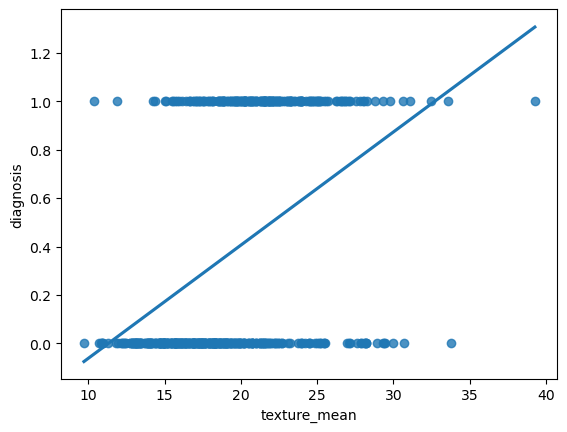

<Axes: xlabel='perimeter_mean', ylabel='diagnosis'>

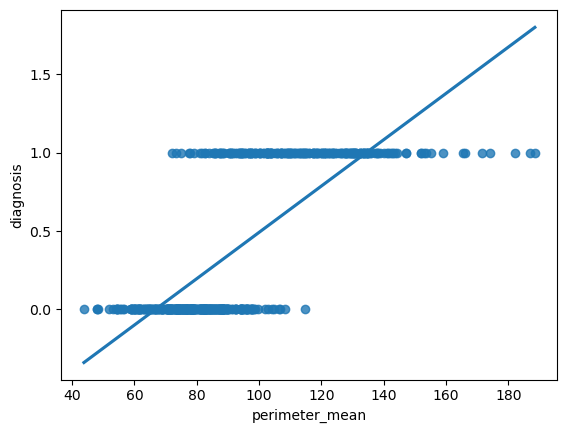

<Axes: xlabel='area_mean', ylabel='diagnosis'>

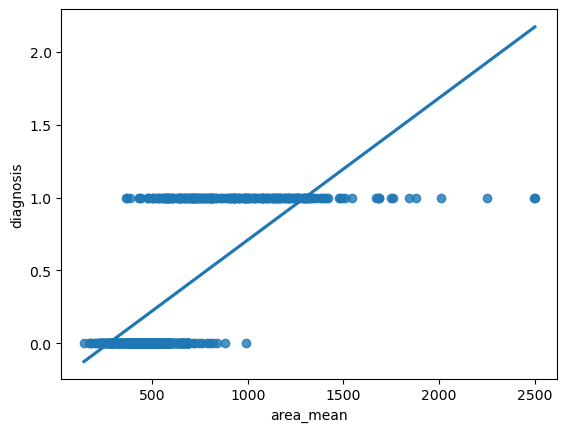

<Axes: xlabel='smoothness_mean', ylabel='diagnosis'>

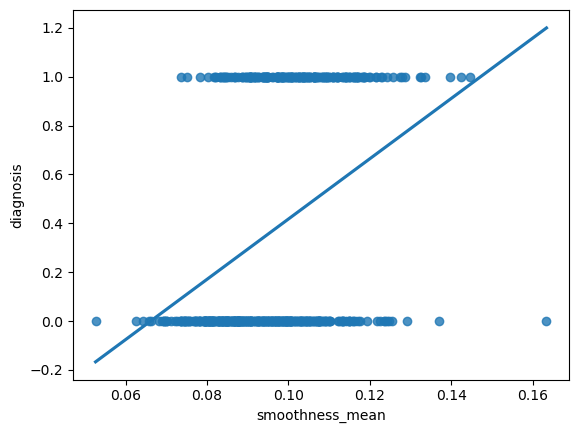

<Axes: xlabel='compactness_mean', ylabel='diagnosis'>

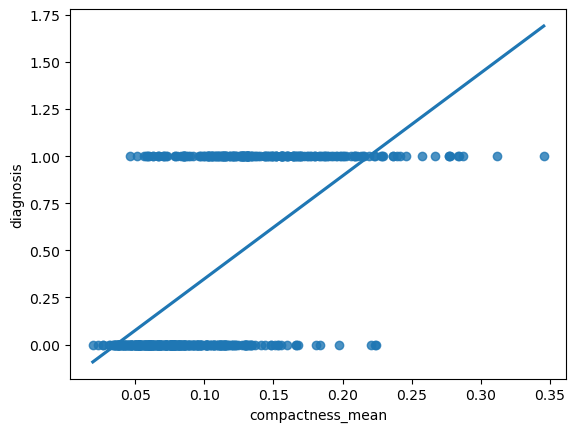

<Axes: xlabel='symmetry_mean', ylabel='diagnosis'>

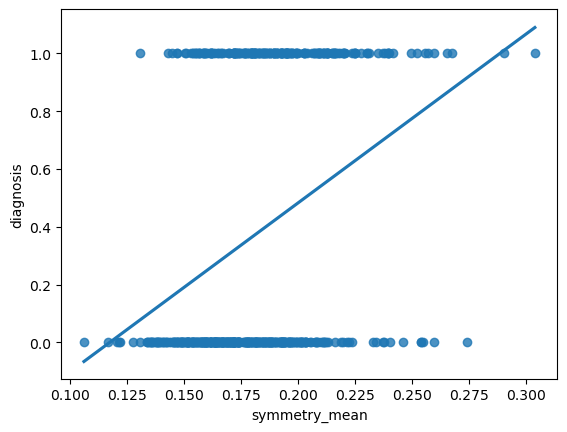

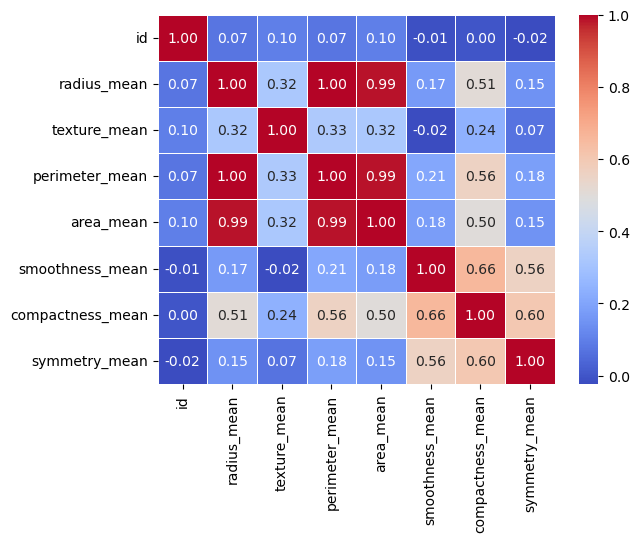

In [13]:
mat=df.corr()
sns.heatmap(mat, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.show()

In [14]:
df.drop('id', axis = 1, inplace=True)

In [15]:
X = df.drop('diagnosis', axis = 1)
y = df.diagnosis

In [16]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.2419
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.1812
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.2069
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2597
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1809
...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.1726
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.1752
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.1590
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.2397


In [17]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [18]:
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [20]:
pred =model.predict(X)
pred

array(['M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B',
       'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'M', 'B', 'M',
       'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'B', 'M',
       'M', 'B', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B',
       'M', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M

In [21]:
df['pred'] = pred
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,symmetry_mean,pred
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.2419,M
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.1812,M
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.2069,M
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2597,B
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1809,M
...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.1726,M
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.1752,M
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.1590,M
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.2397,M


In [22]:
accuracy_score(y, pred)

0.9086115992970123

In [23]:
confusion_matrix(y, pred)

array([[341,  16],
       [ 36, 176]], dtype=int64)